# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

We'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [6]:
# domgross is the outcome variable
from sklearn.model_selection import train_test_split
X = pd_df.drop('domgross', axis=1)
y = pd_df['domgross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1)

In [ ]:
#Your code here

## Fit a regression model to the training data and look at the coefficients

In [12]:
#Your code 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print(X.columns)

Index(['budget', 'imdbRating', 'Metascore', 'imdbVotes'], dtype='object')


In [11]:
reg.coef_

array([ 0.27470484, -0.28383149,  0.2539394 , -0.08426729])

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- a line showing the diagonal of y_train. The actual y_train values are on this line
- next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

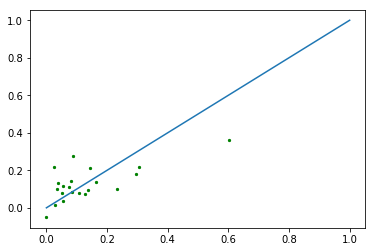

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code here
plt.plot([0,1], [0,1])

y_hat_train = reg.predict(X_train)
plt.scatter(y_train, y_hat_train, color = 'green', s = 5)

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

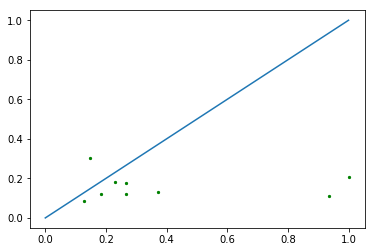

In [17]:
# your code here
plt.plot([0,1], [0,1])

y_hat_test = reg.predict(X_test)
plt.scatter(y_test, y_hat_test, color = 'green', s = 5)

## Calculate the bias
Write a formula to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [37]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

## Calculate the variance
Write a formula to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [38]:
def variance(y_hat):
    return np.mean(y_hat**2) - ((np.mean(y_hat))**2)

In [39]:
print(y_hat_train)
print(y_hat_train**2)

[ 0.09543717  0.11433815  0.10268091  0.07392345  0.3632932   0.13822964
  0.08049269  0.10930152  0.0125995   0.21867664  0.2201948   0.18069568
  0.03563887  0.14382456 -0.04819271  0.07957161  0.21400422  0.10176537
  0.13401008  0.08357114  0.27776219]
[0.00910825 0.01307321 0.01054337 0.00546468 0.13198195 0.01910743
 0.00647907 0.01194682 0.00015875 0.04781947 0.04848575 0.03265093
 0.00127013 0.02068551 0.00232254 0.00633164 0.04579781 0.01035619
 0.0179587  0.00698414 0.07715183]


## Use your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [40]:
# code for train set bias and variance
print(bias(y_train, y_hat_train))
print(variance(y_hat_train))

5.947623346206196e-17
0.008109769344644392


In [41]:
# code for test set bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

-0.23151352190145344
0.003833190000098404


## Describe in words what these numbers can tell you.

Your description here (this cell is formatted using markdown)

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


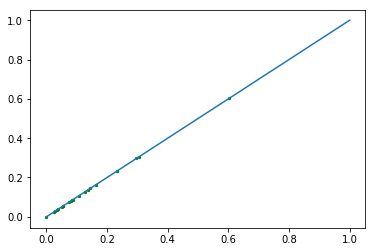

In [44]:
from sklearn.preprocessing import PolynomialFeatures
# your code here
poly = PolynomialFeatures(3)
new_X = poly.fit_transform(X)
new_X_train = poly.fit_transform(X_train)
new_X_test = poly.fit_transform(X_test)

reg = LinearRegression()
reg.fit(new_X_train, y_train)


## Plot your overfitted model's training predictions against the actual data

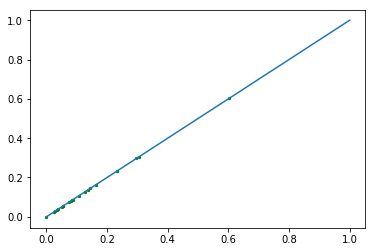

In [45]:
# your code here
plt.plot([0,1], [0,1])

new_y_hat_train = reg.predict(new_X_train)
plt.scatter(y_train, new_y_hat_train, color = 'green', s = 5)

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [46]:
# your code here
print(bias(y_train, new_y_hat_train))
print(variance(new_y_hat_train))

-1.837154766939247e-16
0.017946275087578355


## Plot your overfitted model's test predictions against the actual data.

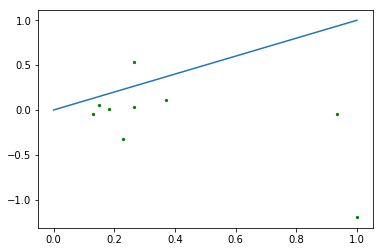

In [48]:
# your code here
plt.plot([0,1], [0,1])

new_y_hat_test = reg.predict(new_X_test)
plt.scatter(y_test, new_y_hat_test, color = 'green', s = 5)

##  Calculate the bias and variance for the train set.

In [49]:
# your code here
print(bias(y_test, new_y_hat_test))
print(variance(new_y_hat_test))

-0.4873547581143639
0.19573460061551184


## Describe what you notice about the bias and variance statistics for your overfit model

The bias and variance for the test set both increased drastically in the overfit model.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight in how bias and variance change for a training and test set by using a pretty "simple" model, and a very complex model. 